In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering, MeanShift, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
from utills import *
plt.style.use('default')

warnings.filterwarnings('ignore')

In [2]:
table = pd.read_csv('train2.csv')
table_test = pd.read_csv('test2.csv')
feature_number = ['id', 'ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen']
feature_categories = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService',
              'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
              'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
iris = load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target

In [3]:
clusters = 2
y = table['Churn']
table.drop(['Churn'], axis=1, inplace=True)

In [4]:
table[feature_categories] = table[feature_categories].astype('category')
table_test[feature_categories] = table_test[feature_categories].astype('category')

In [5]:
table[feature_number[3]] = pd.to_numeric(table[feature_number[3]],errors='coerce')
table[feature_number[3]] = table[feature_number[3]].fillna(table[feature_number[3]].median())

table_test[feature_number[3]] = pd.to_numeric(table_test[feature_number[3]],errors='coerce')
table_test[feature_number[3]] = table_test[feature_number[3]].fillna(table_test[feature_number[3]].median())

In [6]:
table = pd.get_dummies(table, columns=feature_categories)

table_test_categorical = pd.get_dummies(table_test, columns=feature_categories)

In [7]:
scaler = MinMaxScaler()
table[[*feature_number]] = scaler.fit_transform(table[[*feature_number]])
table.drop('id', axis=1, inplace=True)
feature_number.remove('id')


table_test_categorical[[*feature_number]] = scaler.fit_transform(table_test_categorical[[*feature_number]])

In [8]:
X = table[feature_number]

## Класстеризация

Adjusted Rand Index -0.0048
Adjusted Mutual Information 0.0332
Homogeneity 0.0362
Silhouette 0.3689
Без правого локтя
Adjusted Rand Index 0.0427
Adjusted Mutual Information 0.063
Homogeneity 0.1064
Silhouette 0.4373


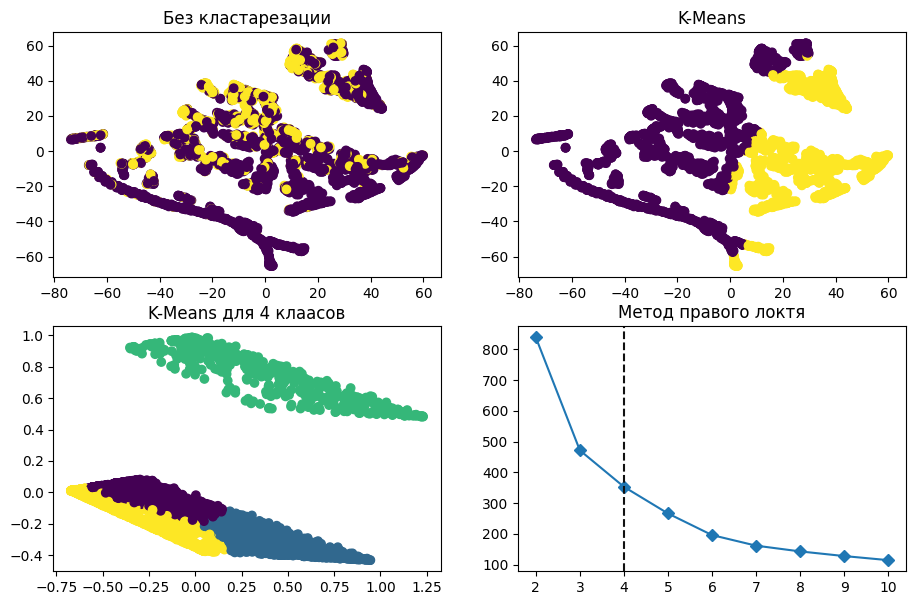

In [9]:
kmeans(X, y, clusters)

Adjusted Rand Index 0.323
Adjusted Mutual Information 0.3553
Homogeneity 0.2928
Silhouette 0.463
Без правого локтя
Adjusted Rand Index 0.366
Adjusted Mutual Information 0.4698
Homogeneity 0.5777
Silhouette 0.4118


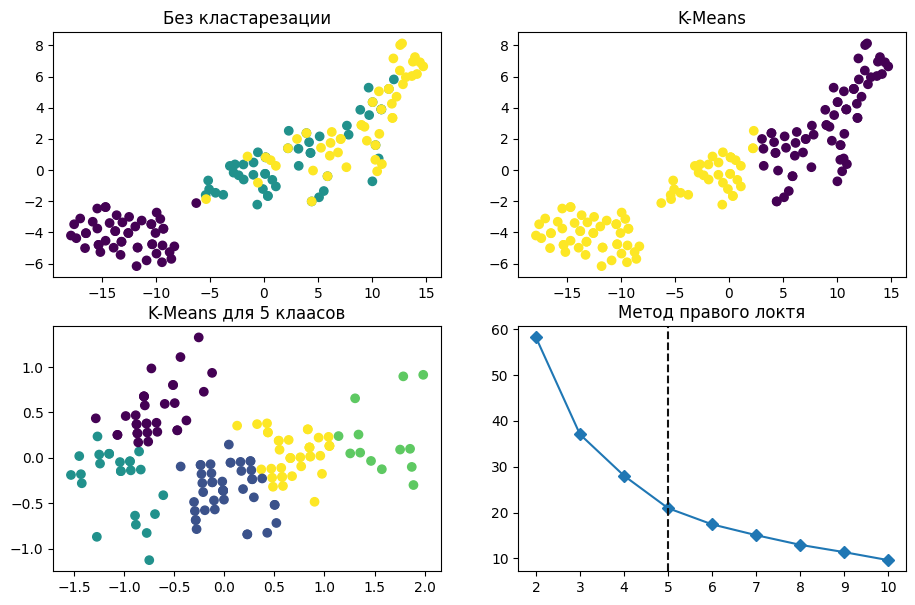

In [10]:
kmeans(X_iris, y_iris, clusters)

Adjusted Rand Index 0.0239
Adjusted Mutual Information 0.0419
Homogeneity 0.0579
Silhouette 0.4605
Лучшие параметры {'threshold': 0.6, 'branching_factor': 2}


Birch(branching_factor=2, n_clusters=5, threshold=0.6)

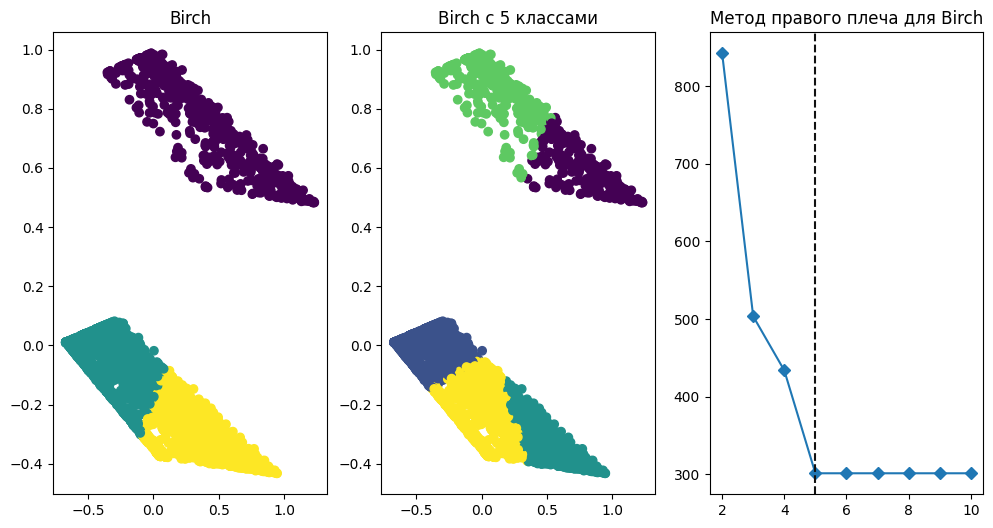

In [11]:
birch(X, y, 0.7)

Adjusted Rand Index 0.3056
Adjusted Mutual Information 0.3399
Homogeneity 0.2796
Silhouette 0.4578
Лучшие параметры {'threshold': 0.8, 'branching_factor': 2}


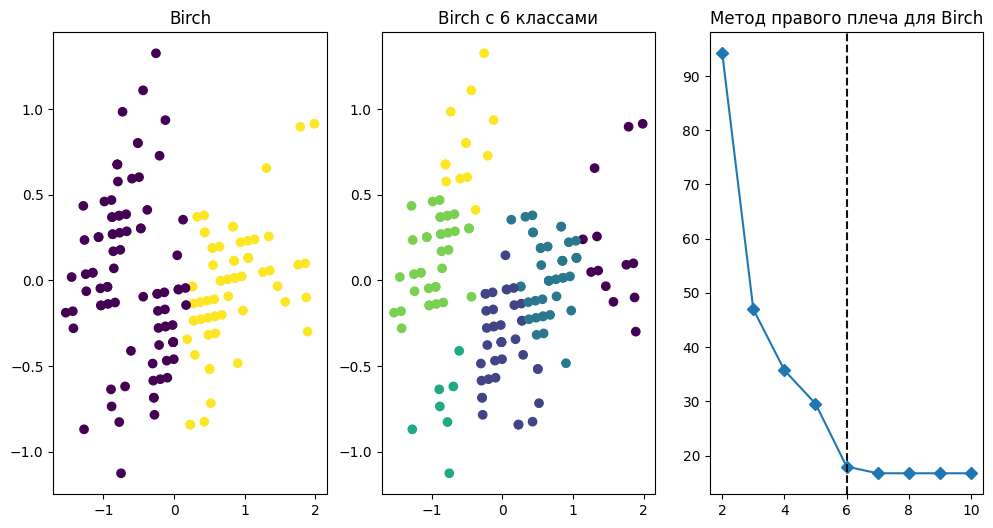

In [12]:
b = birch(X_iris, y_iris, 1)

In [13]:
# dendrogram(X)

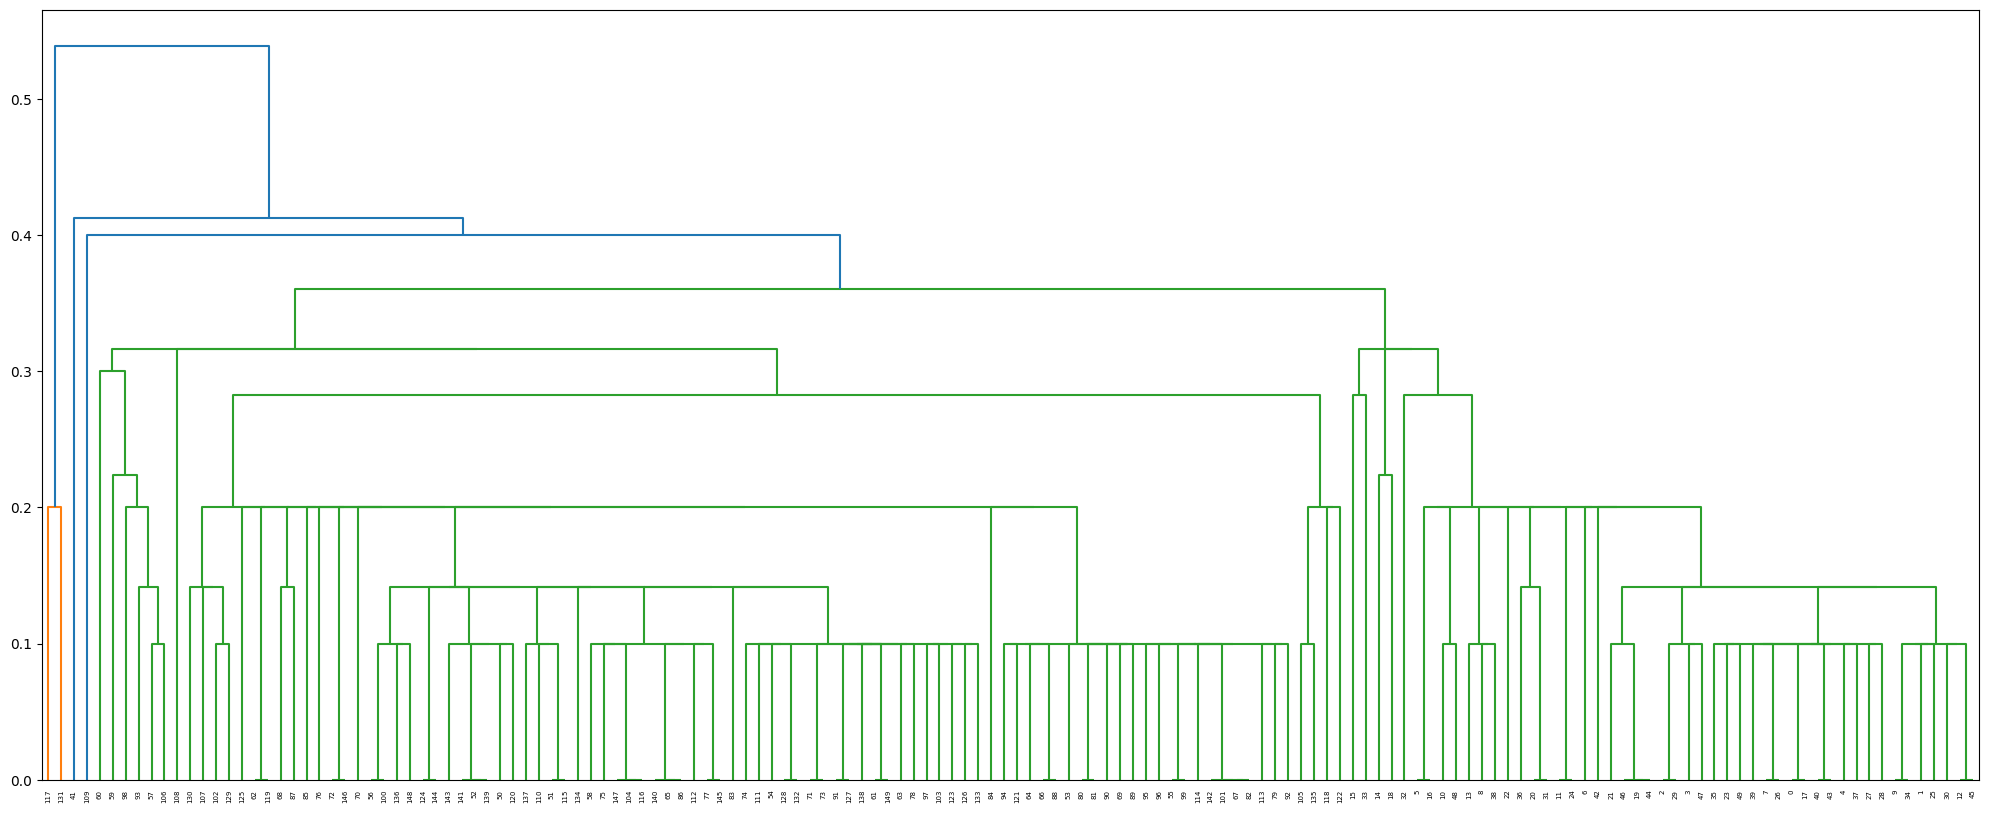

In [14]:
dendrogram(X_iris)